In [40]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

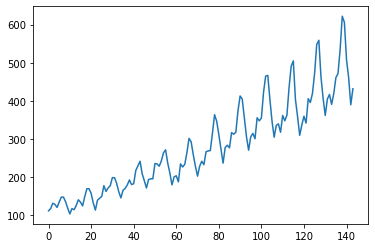

In [41]:
dataframe = read_csv('AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [42]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [43]:
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [44]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)


In [45]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [46]:
seq_size = 20 # Number of time steps to look back 

In [47]:
from keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
batch_size = 1
train_generator = TimeseriesGenerator(train.reshape(-1), train.reshape(-1), length=seq_size, batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train)) 
print("Total number of samples in the generated data = ", len(train_generator))

Total number of samples in the original training data =  95
Total number of samples in the generated data =  75


In [48]:
validation_generator = TimeseriesGenerator(test.reshape(-1), test.reshape(-1), length=seq_size, batch_size=batch_size)


In [49]:
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) 
model.add(Dense(32, activation='relu'))  
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1344      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)

Epoch 1/100


C:\Users\jpolo\AppData\Local\Temp\ipykernel_2720\416170021.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)


75/75 - 1s - loss: 0.0065 - acc: 0.0000e+00 - val_loss: 0.0147 - val_acc: 0.0345 - 550ms/epoch - 7ms/step
Epoch 2/100
75/75 - 0s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0075 - val_acc: 0.0345 - 82ms/epoch - 1ms/step
Epoch 3/100
75/75 - 0s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0076 - val_acc: 0.0345 - 83ms/epoch - 1ms/step
Epoch 4/100
75/75 - 0s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0064 - val_acc: 0.0345 - 88ms/epoch - 1ms/step
Epoch 5/100
75/75 - 0s - loss: 8.4718e-04 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0345 - 90ms/epoch - 1ms/step
Epoch 6/100
75/75 - 0s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0345 - 88ms/epoch - 1ms/step
Epoch 7/100
75/75 - 0s - loss: 9.6300e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0345 - 82ms/epoch - 1ms/step
Epoch 8/100
75/75 - 0s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0345 - 93ms/epoch - 1ms/step
Epoch 9/100
75/75 - 0s - loss: 5.5204e-04 - acc: 0.0000e+00 - val_l

Epoch 69/100
75/75 - 0s - loss: 3.7663e-04 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0345 - 80ms/epoch - 1ms/step
Epoch 70/100
75/75 - 0s - loss: 6.1370e-04 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0345 - 88ms/epoch - 1ms/step
Epoch 71/100
75/75 - 0s - loss: 6.6606e-04 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0345 - 80ms/epoch - 1ms/step
Epoch 72/100
75/75 - 0s - loss: 7.8608e-04 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0345 - 86ms/epoch - 1ms/step
Epoch 73/100
75/75 - 0s - loss: 2.5758e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0345 - 80ms/epoch - 1ms/step
Epoch 74/100
75/75 - 0s - loss: 2.7994e-04 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0345 - 90ms/epoch - 1ms/step
Epoch 75/100
75/75 - 0s - loss: 4.6877e-04 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0345 - 90ms/epoch - 1ms/step
Epoch 76/100
75/75 - 0s - loss: 3.4546e-04 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0345 - 90ms/epoch - 1ms/step
Epoch 77/100
75/75 - 0s 

In [51]:
trainPredict = model.predict(train_generator)
testPredict = model.predict(validation_generator)

29/29 [==============================] - 0s 367us/step


In [52]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform(train)
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform(test)

In [53]:
trainScore = math.sqrt(mean_squared_error(trainY_inverse[seq_size:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[seq_size:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.90 RMSE
Test Score: 21.62 RMSE


In [54]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(seq_size*2)-1:len(dataset)-1, :] = testPredict
testPredictPlot[len(train)+(seq_size)-1:len(dataset)-1, :] = testPredict

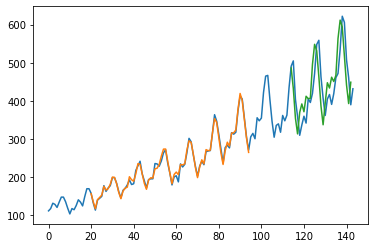

In [55]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()